# Model: Imperfect competition setting

We choose to look at the Bertrand model and analyze the effects of adding firms to the traditional duopoly setting with different initial price levels. We also investigate a Cournot model to investigate the effect of relaxing the assumption of homogenous goods.   

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject as BM
from modelproject import CournotNashEquilibriumSolver as Model
from types import SimpleNamespace
import ipywidgets as widgets

# Bertrand price model: Simple framework

**Model summary** 

To describe the model analytically  we will use a simple framework with two firms in a static environment. The firms produce homogenous goods and set prices simultaneously. Both firms are profit maximizing.

**Total demand**
$$q = D(p)$$ 

**Individual demand faced by firm i**

$$\begin{equation}
  D_i(p_i,p_j)= 
  \left\{
    \begin{array}{lrr}
      0 & \text{if  } p_i > p_j\\
      \cfrac{1}{2}D(p_i) & \text{if  }  p_i = p_j\\
      D(p_i) & \text{if  }  p_i < p_j
    \end{array}
  \right.
\end{equation}$$


**Profits:** 
The individual firm faces the profit function (c is marginal cost):
$$\begin{equation}
  \pi_i(p_i,p_j)= 
  \left\{
    \begin{array}{lrr}
      0 & \text{if  } p_i > p_j\\
      (p_i-c)\cfrac{1}{2}D(p_i) & \text{if  }  p_i = p_j\\
      (p_i-c)D(p_i)& \text{if  }  p_i < p_j
    \end{array}
  \right.
\end{equation}$$

**Normal form (Nash):** 

Firms/Players: $I:=\{Firm1, Firm2\}$ 

Strategy sets: $S_i:= \mathbb(R)^+$ 

Pay-offs: $\pi_i(p_i,p_j)$



# Dynamic game

We will implement successive best-responses for the firms. This means they will keep reacting to the best-response functions of one another until an equilibrium is reached. The Nash Equilibrium solves:

$$NE = max_{a_i}\pi_i (a_i, s_j(a_i))$$

# Solving the model analytically: 




In [3]:
# Defining the parameters of the model
a   = 90
b   = 2
p_i = 4
p_j = 4
c   = 9

In [4]:
# Finding demand
demand = BM.demand(a,b,p_i,p_j)

# Finding profits
profit = BM.profit(p_i,p_j,c, demand)

# Printing results
print(demand, profit)

41.0 -102.5


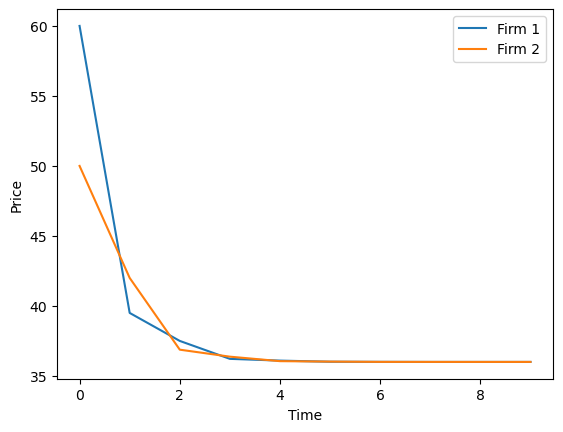

In [5]:
# Optimal proftis

# Set the parameters
n_periods = 10  # Number of time periods
n_firms = 2  # Number of firms
mc = 9  # Marginal cost
q = 90  # Market demand

# Set the initial prices
p = np.zeros((n_firms, n_periods))
p[:, 0] = [60, 50]  # Initial prices

# Simulate the prices over time
for t in range(1, n_periods):
    for i in range(n_firms):
        # Calculate the competitor's price
        j = (i + 1) % n_firms
        competitor_price = p[j, t-1]
        
        # Calculate the firm's best response price
        p_i = ((2*mc+q)/4 + competitor_price/4)
        
        # Check if the price is within the feasible range
        if p_i > 0 and p_i < q:
            p[i, t] = p_i
        else:
            # If not, set the price to the midpoint of the feasible range
            p[i, t] = q / 2
    
# Plot the prices over time
for i in range(n_firms):
    plt.plot(p[i, :], label='Firm {}'.format(i+1))

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


As seen in the plot prices of all the firms in the game converge to the same price, namely the marginal cost, which is the same for all firms. This is in line with the analytical predictions for the Bertrand Model.

## Analytical solution

# Put sympy solution here - Hjalte

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 


In [73]:
q1, q2 = sm.symbols('q_1 q_2')
p1, p2 = sm.symbols('p_1 p_2')
Q = sm.symbols('Q')
A1, A2 = sm.symbols('A_1 A_2')
b = sm.symbols('b')
c = sm.symbols('c')
P1, P2, P = sm.symbols('\Pi_1 \Pi_2 \Pi')



In [74]:
Firm_1_Demand = sm.Eq(q1, A1-2*p1+p2)
Firm_2_Demand = sm.Eq(q2, A2+p1-2*p2)

print('Firm  and 2s demand function:')
display(Firm_1_Demand)
display(Firm_2_Demand)

Firm  and 2s demand function:


Eq(q_1, A_1 - 2*p_1 + p_2)

Eq(q_2, A_2 + p_1 - 2*p_2)

In [75]:
Firm_1_Profit = sm.Eq(P1,p1*(A1-2*p1+p2)-c*(A1-2*p1+p2))
Firm_2_Profit = sm.Eq(P2,p2*(A2+p1-2*p2)-c*(A2+p1-2*p2))
print('Firm 1s profit function: ')
display(Firm_1_Profit)
display(Firm_2_Profit)

Firm 1s profit function: 


Eq(\Pi_1, -c*(A_1 - 2*p_1 + p_2) + p_1*(A_1 - 2*p_1 + p_2))

Eq(\Pi_2, -c*(A_2 + p_1 - 2*p_2) + p_2*(A_2 + p_1 - 2*p_2))

In [76]:
FOC1 = sm.diff(p1*(A1-2*p1+p2)-c*(A1-2*p1+p2),p1)
FOC2 = sm.diff(p2*(A2+p1-2*p2)-c*(A2+p1-2*p2),p2)
print('FOCs: ')
display(FOC1)
display(FOC2)


FOCs: 


A_1 + 2*c - 4*p_1 + p_2

A_2 + 2*c + p_1 - 4*p_2

In [96]:
sol1 = sm.solve(sm.Eq(FOC1,0), p1)
sol2 = sm.solve(sm.Eq(FOC2,0), p2)
display(sol1[0])
display(sol2[0])
display(f'BR_1 = sol1[0]')
display(f'BR_2 = sol2[0]')

# sol1 = sm.solve(sm.Eq(FOC1, 0), p1)[0]
# left_hand_side = sympy.Eq(FOC1, 0).lhs.subs(p1, sol1)

A_1/4 + c/2 + p_2/4

A_2/4 + c/2 + p_1/4

'BR_1 = sol1[0]'

'BR_2 = sol2[0]'

In [83]:
print('Isolerer ')
isolating_p1 = sm.solve(sm.Eq(sol2[0],p2), p1)
isolating_p1[0]

-A_2 - 2*c + 4*p_2

In [84]:
NE_p = sm.solve(sm.Eq(sol1[0],isolating_p1[0]), p2)
NE_p[0]

A_1/15 + 4*A_2/15 + 2*c/3

In [82]:
NE_q = sm.Eq(q1, A1-2*NE_p[0]+NE_p[0])
NE_q

Eq(q_1, 14*A_1/15 - 4*A_2/15 - 2*c/3)

In [ ]:
# SLETTES
# expr = sm.sin(x) + sm.cos(y)
# f = sm.lambdify((x, y), expr, modules='numpy')
# result = f(np.pi/4, np.pi/3)
# print(result)

qi, qj = sm.symbols('q_i q_j')
pi, pj = sm.symbols('p_i p_j')
Q = sm.symbols('Q')
a = sm.symbols('a')
b = sm.symbols('b')
c = sm.symbols('c')
P = sm.symbols('\Pi')

Demand = sm.Eq(Q, a-b*pi)
Demand

Profit = sm.Eq(P,pi*(a-b*pi)-c*(a-b*pi))
Profit

FOC = sm.diff(pi*(a-b*pi)-c*(a-b*pi),pi)
FOC

sol = sm.solve(sm.Eq(FOC,0), pi)
sol[0]

## Further Analysis: Numerical solution for Cournot Duopoly

Here we provide a numerical solution to Cournot Duopoly price competition. We include heterogenous cost functions for the firms in the model and investigate how the optimal production varies with the cost-function gap between the two firms.

In [ ]:
Model()
Model().solve_eq()

array([6.66666667, 6.66666667])

# Further analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


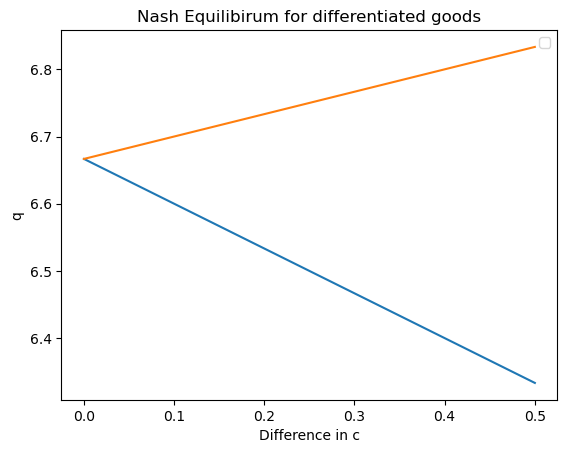

In [ ]:
def plot(a = 1, b = 1, X = 20, c2= 0):
    model = Model()
    # Update model parameters
    model.par.alpha = a
    model.par.beta = b
    model.par.X = X
    model.par.c = [0, c2]
    # x axis grid
    range_c = np.arange(0,0.51,0.01)
    # y axis grid
    range_q = np.zeros((range_c.size,2))
    for it, i in enumerate(range_c):
        # update cost function for company 1
        model.par.c[0] = i
        # find equilibrium quantities
        range_q[it] = model.solve_eq()
    
    plt.plot(range_c, range_q)
    plt.ylabel('q')
    plt.title('Nash Equilibirum for differentiated goods')
    plt.xlabel('Difference in c')
    plt.legend()
    plt.show()
# plot()
"""
    fig, ax = plt.subplots(figsize=(8, 6))
    # plot the function
    for i in range(y.shape[1]):
        ax.plot(range_c, range_q, y[:,i])"""
def plot_interact():
    widgets.interact(plot,
                
                 a=widgets.FloatSlider(
                     description="a", min=1, max=5, step=0.25, value=1),
                 b=widgets.FloatSlider(
                     description="b", min=1, max=5, step=0.25, value=1),
                 x0=widgets.FloatSlider(
                     description="X", min=1, max=50, step=0.5, value=20),
                 c2=widgets.FloatSlider(
                     description="c2", min=0, max=5, step=0.1, value=0)

    );

plot()


We conclude that that gap in optimal quantities varies with the cost-function gap between the firms as expected.

In [ ]:
### Ikke længere relevant - giver uendeligt høje priser og profit
# Set the initial prices and quantities
p0 = np.array([20, 20])
q1 = 10
q2 = 10

# Set the parameters
alpha = 0.5
beta = 0.5
c1 = 10
c2 = 10


# Define the demand function
def demand(p1, p2, q1, q2, alpha, beta):
    return q1**alpha / (q1**alpha + q2**alpha) * (1 - (p1 - beta*q1 - p2 + beta*q2) / (p1 + p2))


# Define the cost functions for each firm
def cost(c1, c2, q1=0, q2=0):
    return c1 * q1 + c2 * q2

# Define the profit function for firm 1
def profit1(p1, p2, q1, q2, c1, alpha, beta):
    q1 = demand(p1, p2, q1, q2, alpha, beta)
    q2 = (1 - q1) * (q1 / (1 - q1))**(1 / alpha)
    return p1 * q1 - cost(q1, c1*q1)

# Define the profit function for firm 2
def profit2(p1, p2, q1, q2, c2, alpha, beta):
    q2 = demand(p2, p1, q2, q1, alpha, beta)
    q1 = (1 - q2) * (q2 / (1 - q2))**(1 / alpha)
    return p2 * q2 - cost(q2, c2*q2)

# Define the constraint for firm 1
constraint1 = {'type': 'ineq', 'fun': lambda q1: q1 - c1}

# Define the constraint for firm 2
constraint2 = {'type': 'ineq', 'fun': lambda q2: q2 - c2}

# Define the objective function to be minimized
def obj(x, alpha, beta, c1, c2):
    p1, p2 = x
    return -(profit1(p1, p2, q1, q2, c1, alpha, beta) + profit2(p1, p2, q1, q2, c2, alpha, beta))

# Solve the model using optimization
res = optimize.minimize(obj, p0, args=(alpha, beta, c1, c2), method='SLSQP', bounds=((0, None), (0, None)), constraints=[constraint1, constraint2])

# Print the optimal prices and profits
p_opt = res.x
q1_opt = demand(p_opt[0], p_opt[1], q1, q2, alpha, beta)
q2_opt = (1 - q1_opt) * (q1_opt / (1 - q1_opt))**(1 / alpha)
profit1_opt = profit1(p_opt[0], p_opt[1], q1_opt, q2_opt, c1, alpha, beta)
profit2_opt = profit2(p_opt[0], p_opt[1], q1_opt, q2_opt, c2, alpha, beta)
print('Optimal prices:', p_opt)
print('Firm 1 profit:', profit1_opt)
print('Firm 2 profit:', profit2_opt)

Optimal prices: [2.25735167e+31 2.25735167e+31]
Firm 1 profit: 1.128675834357657e+31
Firm 2 profit: 1.128675836300651e+31


# Conclusion

We find that by modelling different types of price competition in a oligopoly as well as a duopoly setting we are able to replicate results that correspond to our expectations.